### Chi-Squared Testing Using the Census Income Data Set


Data used is from the UCI Machine Learning Respository
https://archive.ics.uci.edu/dataset/20/census+income  
Download the Census Income data as a .csv for analysis  
See README.md for methodology in model selection & filtering

#### Import Libraries

In [36]:
# Load the following libraries
import pandas as pd # Pandas dataframes
import numpy as np  # 
import matplotlib.pyplot as plt # For plotting
from matplotlib import gridspec
import math # For general math equations
from scipy import stats # For statistics
from scipy.stats import norm # normal continuous random variable
from scipy.stats import chi2_contingency

#### Load the Census Income Data

In [3]:
# Use Pandas to read in all of the census income data
census_all = pd.read_csv('census.csv', sep= ',')
# Identify the data types 
census_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
# Use Pandas to read in selected columns from the census income data
# Removing all non-object columns for Chi-Squared Testing of qualitative variables
census_filt = pd.read_csv('census.csv', sep= ',', usecols=['race','education','income','marital-status','workclass','occupation','native-country'])
# View data types of filtered census income data 
census_filt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   workclass       32560 non-null  object
 1   education       32560 non-null  object
 2   marital-status  32560 non-null  object
 3   occupation      32560 non-null  object
 4   race            32560 non-null  object
 5   native-country  32560 non-null  object
 6   income          32560 non-null  object
dtypes: object(7)
memory usage: 1.7+ MB


`Data types will be left as objects. Chi-squared testing will be used to compare these qualitative variables.`

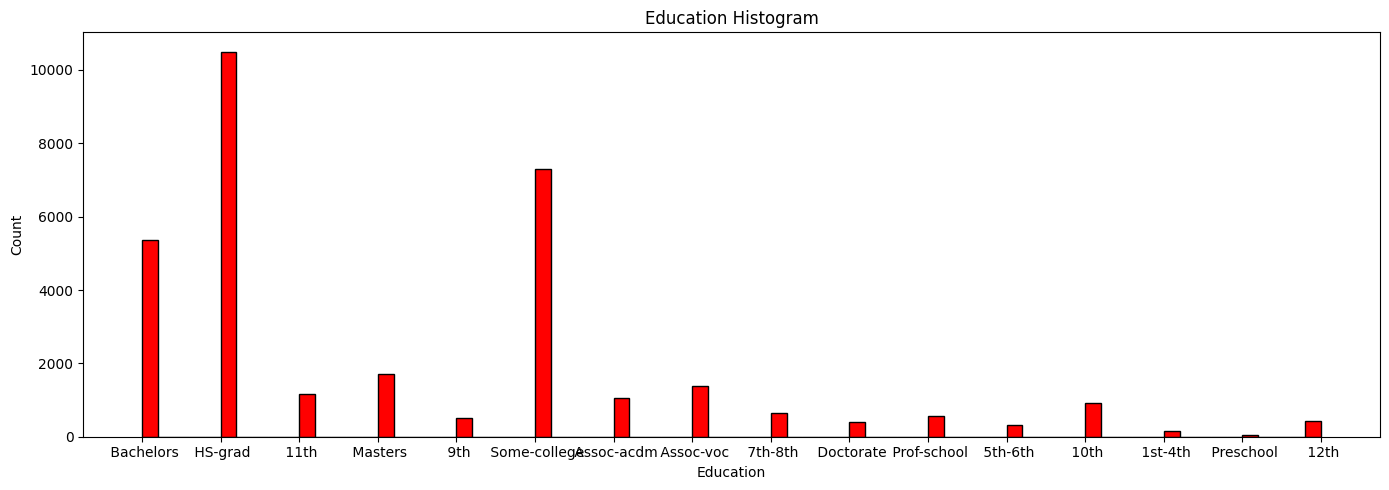

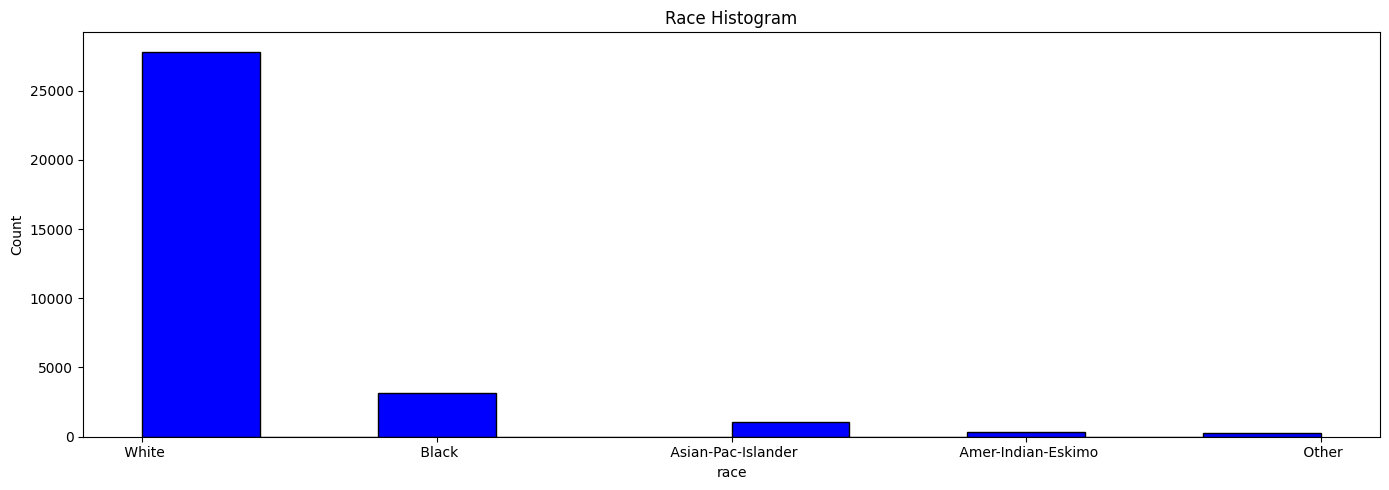

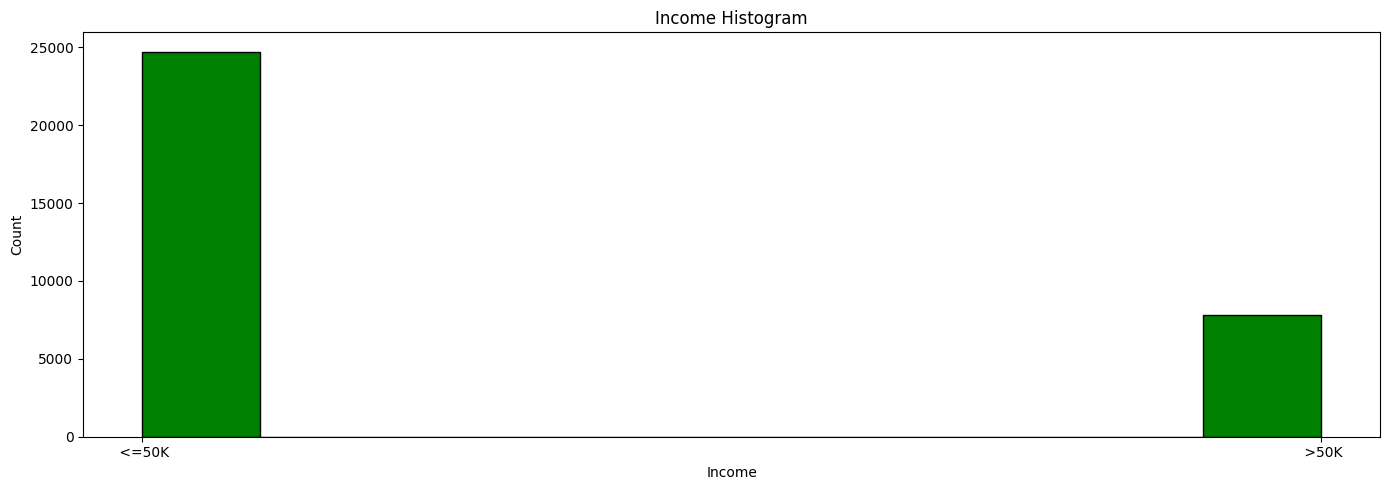

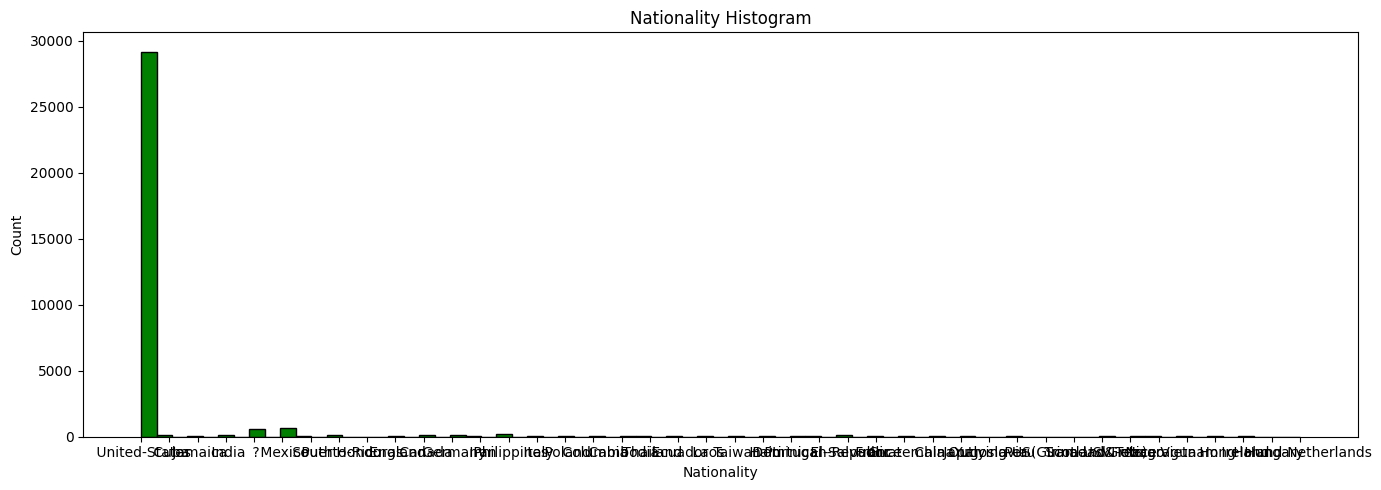

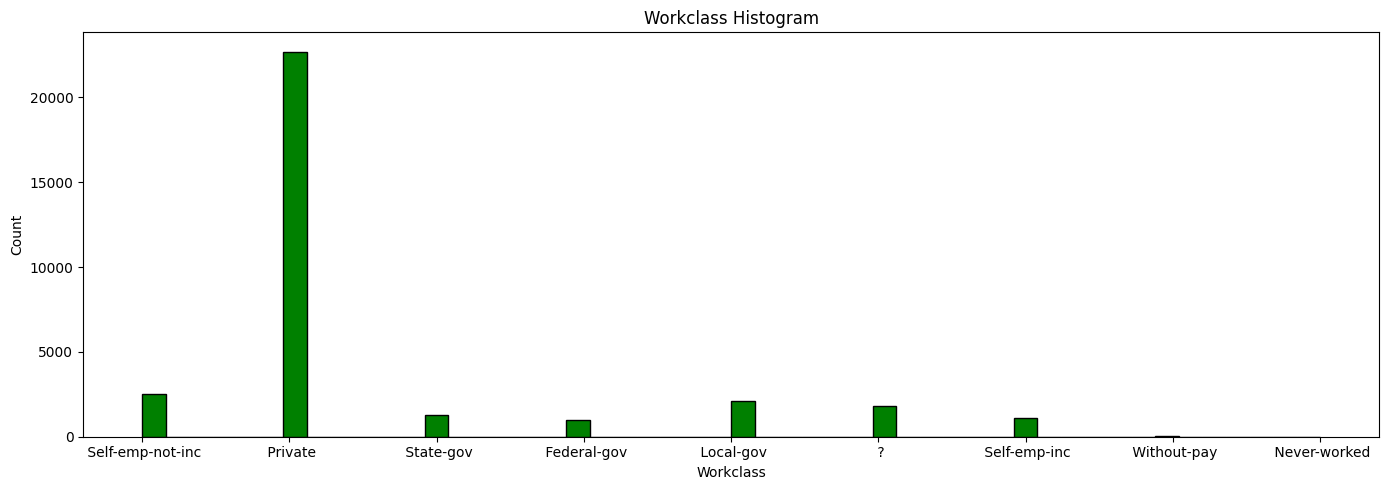

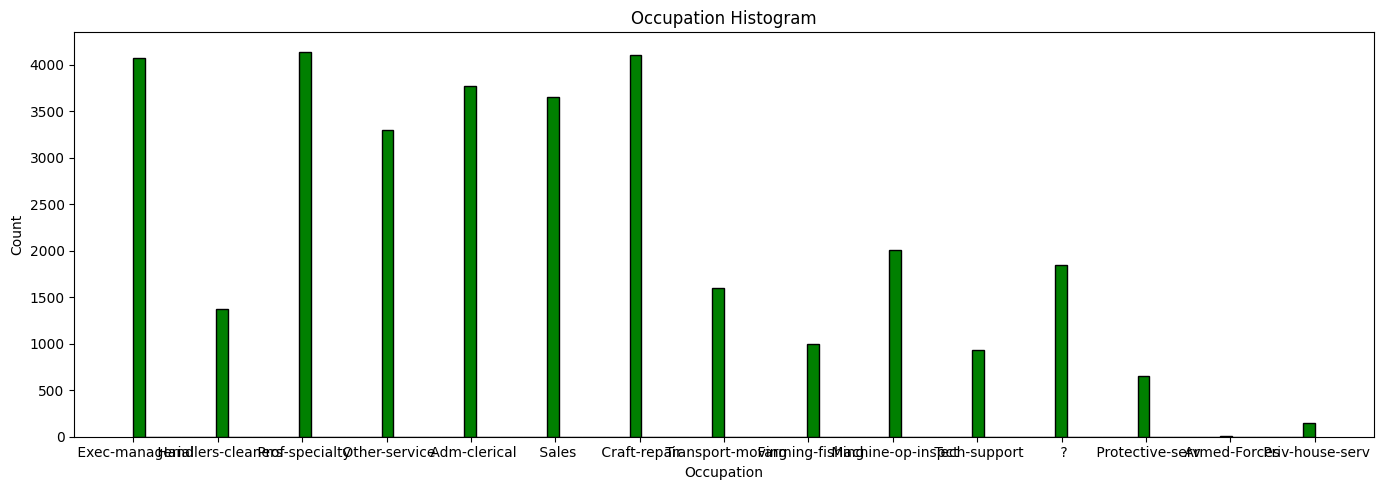

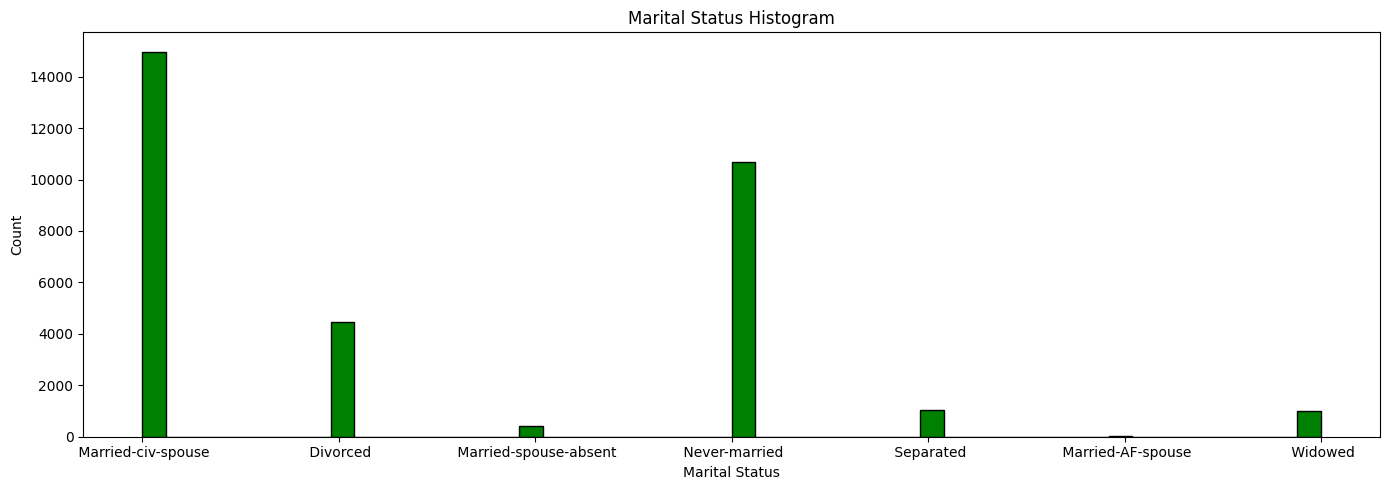

In [5]:
# Using Histograms to visualize the filtered census income dataset
plt.figure(figsize=(14, 5))
plt.hist(census_filt['education'], color='red', edgecolor='black', density=False, bins=75)
plt.ylabel('Count')
plt.xlabel('Education')
plt.title('Education Histogram')
plt.tight_layout()

plt.figure(figsize=(14, 5))
plt.hist(census_filt['race'], color='blue', edgecolor='black', density=False, bins=10)
plt.ylabel('Count')
plt.xlabel('race')
plt.title('Race Histogram')
plt.tight_layout()

plt.figure(figsize=(14, 5))
plt.hist(census_filt['income'], color='green', edgecolor='black', density=False, bins=10)
plt.ylabel('Count')
plt.xlabel('Income')
plt.title('Income Histogram')
plt.tight_layout()

plt.figure(figsize=(14, 5))
plt.hist(census_filt['native-country'], color='green', edgecolor='black', density=False, bins=75)
plt.ylabel('Count')
plt.xlabel('Nationality')
plt.title('Nationality Histogram')
plt.tight_layout()

plt.figure(figsize=(14, 5))
plt.hist(census_filt['workclass'], color='green', edgecolor='black', density=False, bins=50)
plt.ylabel('Count')
plt.xlabel('Workclass')
plt.title('Workclass Histogram')
plt.tight_layout()

plt.figure(figsize=(14, 5))
plt.hist(census_filt['occupation'], color='green', edgecolor='black', density=False, bins=100)
plt.ylabel('Count')
plt.xlabel('Occupation')
plt.title('Occupation Histogram')
plt.tight_layout()

plt.figure(figsize=(14, 5))
plt.hist(census_filt['marital-status'], color='green', edgecolor='black', density=False, bins=50)
plt.ylabel('Count')
plt.xlabel('Marital Status')
plt.title('Marital Status Histogram')
plt.tight_layout()

## Initial Observations
`By visualizing the data we get a better idea of the proportions amongst the categories. A few distinct observations can be made at this point.`  
`OBSERVATION 1: The 'RACE' category shows that the census data is primarily composed of respondents who identified themselves as belonging to the White race. We can also assume that respondents only had five choices to select from for 'RACE'.`  
`OBSERVATION 2: The 'NATIVE-COUNTRY' category shows that the majority of respondents were born in/or from the United States. An assumption can be made that some respondents identifying as being American but born abroad may have identified as being from the United States.`  
`OBSERVATION 3: The 'WORKCLASS' category shows that the majority of respondents work privately. It is unknown what this may encompass. Does it mean that most of the respondents work with private organizations, work on their own, or maybe didn't want to disclose this information? It is unknown. There is also a column labeled '?' and it is unknown what that could represent for a working class.`  
`OBSERVATION 4: The 'OCCUPATION' category has a column labeled '?'. It is unknown what that may represent.`

## Next Steps
`The next steps will involve cleaning the dataset to remove any selections that have a '?'. The initial observation shows that this number is low and will not significantly impact the data.`

## Questions Derived
`It will be interesting to see how many respondents that identified as White are not from the United States.`  
`We can compare each categories significance on the 'INCOME' category.`  
`With majority of respondents saying they work privately, can we drop the 'WORKCLASS' category from analysis?`  
`With majority of respondents being from the United States, is it worth analyzing the 'NATIVE-COUNTRY' category?`

## Data Cleaning

In [6]:
# Strip the data of any white spaces in the data
census_filt['race'] = census_filt['race'].str.strip()
census_filt['income'] =  census_filt['income'].str.strip()
census_filt['education'] = census_filt['education'].str.strip()
census_filt['marital-status'] =  census_filt['marital-status'].str.strip()
census_filt['workclass'] =  census_filt['workclass'].str.strip()
census_filt['native-country'] = census_filt['native-country'].str.strip()
census_filt['occupation'] =  census_filt['occupation'].str.strip()

`'WORKCLASS' category will not be analyzed.`  
`'Armed-Forces' had 9 entries. Removed from 'OCCUPATION'`  
`Remove '?' from 'OCCUPATION'`

In [7]:
# Remove rows with '?' and 'Armed-Forces' from the 'OCCUPATION' column
# Remove rows with '?' from 'NATIVE-COUNTRY'
census_filt = census_filt[census_filt['occupation'] != '?']
census_filt = census_filt[census_filt['native-country'] != '?']
census_filt = census_filt[census_filt['occupation'] != 'Armed-Forces']

In [8]:
# Verify the 'OCCUPATION' category is free from '?' and 'Armed-Forces'
#census_filt['race'].value_counts()

## Visualize the Cleaned Data
##### Decided to use a function to visualize the distribution for each variable.

In [9]:
# Create a plotting function for a cleaner looking plot

def discrete_plots(df, columns, num_cols, title):
    n_plots = len(columns)
    n_cols = num_cols
    n_rows = int(math.ceil(n_plots/n_cols))
    gs = gridspec.GridSpec(n_rows, n_cols)
    fig = plt.figure(figsize=(14,5))
    for i in range(n_plots):
        ax = fig.add_subplot(gs[i])
        df[columns[i]].value_counts().sort_index().plot(kind='bar', ax=ax, edgecolor='black')
        ax.set_xlabel(columns[i])
        ax.set_ylabel('Count', color='blue')
        plt.title(title)
    fig.tight_layout()
    #fig.suptitle('Discrete Plot')
    plt.show()

In [48]:
# display the discrete_plot function - JC
#discrete_plots(census_filt, ['race','income'], 2, 'Full Census Dataset')

In [49]:
# display the discrete_plot function - JC
#discrete_plots(census_filt, ['occupation','native-country'], 2, 'Full Census Dataset')

In [50]:
#discrete_plots(census_filt, ['education','marital-status'], 2, '')

In [51]:
#discrete_plots(census_filt, ['workclass','race'], 2, '')

##### Now we will filter the 'census_filt' dataset to identify respondents that identified as White but were not born in the United States. The results show there were 1,715 out of 25,925; representing 6.6%. We also look at the entire dataset to identify everyone not identifying the United States as their native countryand that 2,658 out of 32,549 or 8.2% of respondents responded as such.

In [14]:
# Filter data to show all White respondents with a native country other than the United States 
white = census_filt.loc[census_filt['race']=='White']
nonUS_white = white.loc[white['native-country']!='United-States']
nonUS_white['race'].value_counts()

race
White    1715
Name: count, dtype: int64

In [52]:
# Visualize the Native Country breakdown and the Income 
#discrete_plots(nonUS_white, ['native-country', 'income'], 2, 'Non-US Identifying as White')

In [53]:
#nonUS_white.describe()

##### We do the same thing to identify all respondents, regardless of race, whose Native Country is not the United States

In [54]:
nonUS_all = census_filt.loc[census_filt['native-country']!='United-States']
#nonUS_all['race'].value_counts()

In [56]:
#discrete_plots(nonUS_all, ['native-country', 'income'], 2, 'All Non-US Nationalities')

In [55]:
#nonUS_all['income'].value_counts()

##### The results are interesting. Non-US nationalities show a high percentage of income <= 50K.

##### We will now take a look at the White race exclusively.

In [57]:
# Filter for all White respondents
white = census_filt.loc[census_filt['race']=='White']
#white.info()

In [58]:
#discrete_plots(white, ['income'], 2, 'All White Respondents')

##### So it looks like regardless of race it is very likely someone will make <= 50K. By visualizing the data in various ways we can begin to formulate better questions for the data. A thorough understanding of the data assists in the analysis and interpretation of test results. We can also see gaps in the data where we may need to make some assumptions.  
##### For example, our cursory look at the data made it look like the White race may proportionaly have more respondents that make > $50K. Yet the visualized data shows the proportions are fairly similiar. Lets take a look at what the actual proportions are.

In [59]:
#census_filt['race'].value_counts()
#nonUS_all.head()

In [23]:
# Variables for the total of each races dataset

white_t = 25925
black_t = 2816
aspac_t = 895
asind_t = 285
nonUSwhite_t = 1715
nonUSall_t = 2658

In [60]:
# Variables for 'income' over $50K for each race
over50white = white.loc[white['income']=='>50K']
#over50white.describe()

In [61]:
black = census_filt.loc[census_filt['race']=='Black']
over50black = black.loc[black['income']=='>50K']
#over50black.describe()

In [62]:
aspac = census_filt.loc[census_filt['race']=='Asian-Pac-Islander']
over50aspac = aspac.loc[aspac['income']=='>50K']
#over50aspac.describe()

In [63]:
asind = census_filt.loc[census_filt['race']=='Amer-Indian-Eskimo']
over50asind = asind.loc[asind['income']=='>50K']
#over50asind.describe()

In [64]:
over50nUSwhite = nonUS_white.loc[nonUS_white['income']=='>50K']
#over50nUSwhite.describe()

In [65]:
over50nUSall = nonUS_all.loc[nonUS_all['income']=='>50K']
#over50nUSall.describe()

In [30]:
# calculating proportions for each race where 'income' is over $50K 
prop_over50white = 6838 / white_t
prop_over50black = 366 / black_t
prop_over50aspac = 248 / aspac_t
prop_over50asind = 34 / asind_t
prop_over50nUSwhite = 300 / nonUSwhite_t
prop_over50nUSall = 513 / nonUSall_t

In [31]:
racelist = [prop_over50white, prop_over50black, prop_over50aspac, prop_over50asind, prop_over50nUSwhite, prop_over50nUSall]
races = ['White', 'Black', 'Asian-Pacific', 'Asian-Indian-Eskimo', 'White Non-US', 'All Non-US']

for races, racelist in zip(races, racelist):
    print(f"The proportion of {races} respondents making over $50K is: {racelist:.2f}%")

The proportion of White respondents making over $50K is: 0.26%
The proportion of Black respondents making over $50K is: 0.13%
The proportion of Asian-Pacific respondents making over $50K is: 0.28%
The proportion of Asian-Indian-Eskimo respondents making over $50K is: 0.12%
The proportion of White Non-US respondents making over $50K is: 0.17%
The proportion of All Non-US respondents making over $50K is: 0.19%


## Significance Testing with Chi-Squared Method
##### Various tests will be conducted.  
##### 1) Test the significance of education on income for all races.

In [33]:
# Create frequency tables - White Race
income_table_w = pd.crosstab(white['education'], white['income'])
print(income_table_w)
print(' ')
print(pd.crosstab(white['education'], white['income'], normalize='index'))

income        <=50K  >50K
education                
10th            617    51
11th            833    49
12th            280    25
1st-4th         118     5
5th-6th         234     8
7th-8th         442    34
9th             339    20
Assoc-acdm      635   231
Assoc-voc       823   319
Bachelors      2507  1939
Doctorate        84   254
HS-grad        6910  1488
Masters         623   834
Preschool        33     0
Prof-school     117   369
Some-college   4492  1212
 
income           <=50K      >50K
education                       
10th          0.923653  0.076347
11th          0.944444  0.055556
12th          0.918033  0.081967
1st-4th       0.959350  0.040650
5th-6th       0.966942  0.033058
7th-8th       0.928571  0.071429
9th           0.944290  0.055710
Assoc-acdm    0.733256  0.266744
Assoc-voc     0.720665  0.279335
Bachelors     0.563878  0.436122
Doctorate     0.248521  0.751479
HS-grad       0.822815  0.177185
Masters       0.427591  0.572409
Preschool     1.000000  0.000000
Pr

In [83]:
# Function for Chi-Squared Testing
def chisquare_test(table):
    stat, p_value, dof, expected = chi2_contingency(table, correction=False)
    # Interpret p-value
    alpha = 0.05
    print("The p-value is {}".format(p_value))
    if p_value <= alpha:
        print('There is a relationship between the categories.')
    else:
        print('There is no relationship between the categories.')

In [44]:
chisquare_test(income_table_w)

The p-value is 0.0
There is a relationship between the variables.


In [46]:
# Create frequency tables - White Race
income_table_b = pd.crosstab(black['education'], black['income'])
#print(income_table_b)
#print(' ')
#print(pd.crosstab(black['education'], black['income'], normalize='index'))

In [47]:
chisquare_test(income_table_b)

The p-value is 1.6259008346127127e-49
There is a relationship between the variables.


In [68]:
income_table_w = pd.crosstab(white['education'], white['income'])
income_table_ap = pd.crosstab(aspac['education'], aspac['income'])
income_table_ai = pd.crosstab(asind['education'], asind['income'])
income_table_b = pd.crosstab(black['education'], black['income'])
income_table_na = pd.crosstab(nonUS_all['education'], nonUS_all['income'])
income_table_nw = pd.crosstab(nonUS_white['education'], nonUS_white['income'])

In [69]:
#table_list = [income_table_w,income_table_ap,income_table_ai,
              #income_table_b,income_table_na,income_table_nw,]

In [82]:
print('The Chi-Squared results between education and income for all White respondents are:')
chisquare_test(income_table_w)

The Chi-Squared results between education and income for all White respondents are:
The p-value is 0.0
There is a relationship between the variables.


In [84]:
print('The Chi-Squared results between education and income for all Asian-Pacific-Islanders respondents are:')
chisquare_test(income_table_ap)

The Chi-Squared results between education and income for all Asian-Pacific-Islanders respondents are:
The p-value is 1.1817251497013777e-16
There is a relationship between the categories.


In [85]:
print('The Chi-Squared results between education and income for all Asian-Indian-Eskimo respondents are:')
chisquare_test(income_table_ai)

The Chi-Squared results between education and income for all Asian-Indian-Eskimo respondents are:
The p-value is 2.916280659604687e-06
There is a relationship between the categories.


In [86]:
print('The Chi-Squared results between education and income for all Black respondents are:')
chisquare_test(income_table_b)

The Chi-Squared results between education and income for all Black respondents are:
The p-value is 1.6259008346127127e-49
There is a relationship between the categories.


In [87]:
print('The Chi-Squared results between education and income for all Non-US Nationality respondents are:')
chisquare_test(income_table_na)

The Chi-Squared results between education and income for all Non-US Nationality respondents are:
The p-value is 1.087013099057208e-92
There is a relationship between the categories.


In [89]:
print('The Chi-Squared results between education and income for all Non-US respondents identifying as White are:')
chisquare_test(income_table_nw)

The Chi-Squared results between education and income for all Non-US respondents identifying as White are:
The p-value is 1.9075440446039817e-58
There is a relationship between the categories.
